In [74]:
import pandas as pd

In [75]:
df=pd.read_csv("/content/Fraud.csv")

In [76]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [78]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [79]:
DATA CLEANING

SyntaxError: invalid syntax (ipython-input-2286459319.py, line 1)

# DATA CLEANING
- check for missing values, there were no misssing values in the dataset
- Outliers: Analyzed `amount` distribution using boxplots and log-transformations (if applicable).
- Multicollinearity: Used correlation heatmap to check for highly correlated features. No extreme correlations were found that warranted removal.

In [ ]:
df.isnull().sum()

In [ ]:
df['isFraud'].value_counts(normalize=True)

In [ ]:
print("Shape of dataset:", df.shape)

In [ ]:
print("\nSummary Statistics:")
print(df.describe())

# Check for class balance in 'isFraud'
print("\nFraud Class Distribution:")
print(df['isFraud'].value_counts(normalize=True))

In [ ]:
df['isFlaggedFraud'].value_counts()

In [ ]:
df['nameDest'].value_counts()

In [ ]:
df['nameOrig'].value_counts()

#Feature selection was based on:
EDA- two values in type_col: transfer and cash_out were the only transaction types linked with fraud

- removed 3 cols['nameOrig','nameDest','isFlaggedFraud'] did not had any value for prediction

In [ ]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [ ]:
df.head()

one-hot-encoding on TYPE COL, and used only 'TRANSFER','CASH_OUT' transactions for modeling.

In [ ]:
df.groupby(['type','isFraud']).size().unstack()

In [ ]:
df=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [ ]:
df.head()

In [ ]:
df.tail()

Feature **ENG**

Created two derived features 'errorBalanceorig' and 'errorBalanceDest'

In [ ]:
df['errorBalanceorig'] = df['oldbalanceOrg']-df['newbalanceOrig']-df['amount']

In [ ]:
df['errorBalanceDest']=df['oldbalanceDest']+df['amount']-df['newbalanceDest']

In [ ]:
df.head()

In [ ]:
df.tail()


In [ ]:
# one-hot encod 'type' col
df=pd.get_dummies(df, columns=['type'])

In [ ]:
df.head()

In [ ]:
df['isFraud'].value_counts()

In [ ]:
df_fraud=df[df['isFraud']==1]

In [ ]:
df_notFraud=df[df['isFraud']==0]

In [ ]:
print(len(df_fraud))
print(len(df_notFraud))

In [ ]:
df_notFraud_sample=df_notFraud.sample(n=len(df_fraud),random_state=2)

In [ ]:
df_balanced=pd.concat([df_fraud, df_notFraud_sample])

In [ ]:
df_balanced.head()

In [ ]:
df_balanced.value_counts('isFraud')

In [80]:
df_balanced=df_balanced.sample(frac=1, random_state=2)

In [81]:
# splitting

In [82]:
y=df_balanced['isFraud']

In [83]:
x=df_balanced.drop(['isFraud'], axis=1)

In [84]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceorig,errorBalanceDest,type_CASH_OUT,type_TRANSFER
99372,10,503405.88,503405.88,0.0,29669.00,533074.88,0.00,0.00,True,False
12468,7,441445.58,441445.58,0.0,98993.50,0.00,0.00,540439.08,True,False
7029,6,85354.69,85354.69,0.0,0.00,0.00,0.00,85354.69,False,True
42543,9,179823.33,22.00,0.0,709195.00,889018.33,-179801.33,0.00,True,False
6703,6,17320.91,17320.91,0.0,6244.44,0.00,0.00,23565.35,True,False


In [85]:
y.head()

,isFraud
99372,1.0
12468,1.0
7029,1.0
42543,0.0
6703,1.0


In [86]:
print(x.shape)

(254, 10)


In [87]:
print(y.shape)

(254,)


In [88]:
from sklearn.model_selection import train_test_split

### Outlier Handling

To remove extreme outliers, we applied the IQR (Interquartile Range) method on the training dataset. This helps prevent the model from being skewed by anomalous transaction values that may not represent true fraud patterns.


In [89]:
# Outlier detection using IQR method
# Select only numeric columns for outlier detection
numeric_cols = x_train.select_dtypes(include=['number']).columns

Q1 = x_train[numeric_cols].quantile(0.25)
Q3 = x_train[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a mask to remove rows with extreme outliers
mask = ~((x_train[numeric_cols] < (Q1 - 1.5 * IQR)) | (x_train[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask
x_train = x_train[mask]
y_train = y_train[mask]

In [90]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=2, stratify=y)

In [91]:
x_train.shape

(203, 10)

In [92]:
y_train.shape

(203,)

In [93]:
x_test.shape

(51, 10)

In [94]:
y_test.shape

(51,)

### Multicollinearity Check

We calculated the Variance Inflation Factor (VIF) for each feature to detect multicollinearity. A high VIF (>10) may indicate redundant variables that can harm model interpretability and performance. If any such features are found, we can consider dropping or combining them.


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric columns for VIF calculation
numeric_x_train = x_train.select_dtypes(include=['number'])

# Compute VIF
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_x_train.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_x_train.values, i) for i in range(numeric_x_train.shape[1])]

# Display high VIF features
print(vif_data.sort_values("VIF", ascending=False))

            feature       VIF
1            amount       inf
2     oldbalanceOrg       inf
3    newbalanceOrig       inf
4    oldbalanceDest       inf
6  errorBalanceorig       inf
5    newbalanceDest       inf
7  errorBalanceDest       inf
0              step  1.471034


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# Model Description
comparing three diferent models:
- [random forest, kogistic regression, xgboost]
- random forest and XGBoost: since we are handling large dataset, non-linear relationships, structured data

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


In [97]:
# random forest
randomforest_model=RandomForestClassifier(random_state=2)
randomforest_model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [98]:
# xgboost
xgbmodel=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=2)
xgbmodel.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:09:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [99]:
# logistic regression
logregmodel=LogisticRegression(random_state=2)
logregmodel.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [100]:
from sklearn.metrics import classification_report

In [101]:
models={'random_forest':randomforest_model,'xgBoost': xgbmodel,'Logistic_reg': logregmodel }

In [102]:
for name,model in models.items():
  print(f"\n{name} Performance:\n")
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))


random_forest Performance:

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51


xgBoost Performance:

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51


Logistic_reg Performance:

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88        26
         1.0       0.95      0.76      0.84        25

    accuracy                           0.86        51
   macro avg       0.88      0.86      0.86     

# Fine-Tuning

In [103]:
# cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [104]:
# random forest fine-tuning
# hypermeter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
randomforest_para={'n_estimators': [100,200],
                   'max_depth': [None,10,20],
                   'min_samples_split': [2, 5],
                   'min_samples_leaf': [1, 2]}
grid_rf=GridSearchCV(RandomForestClassifier(random_state=2), randomforest_para, cv=skf, scoring='f1', n_jobs=-1)
grid_rf.fit(x_train, y_train)
best_rf=grid_rf.best_estimator_

In [106]:
print(grid_rf.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [107]:
print(round(grid_rf.best_score_, 4))

0.9451


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
importances = best_rf.feature_importances_
features =x_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False).head(20)

/tmp/ipython-input-1296519587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df,x='importance', y='feature', palette='viridis')


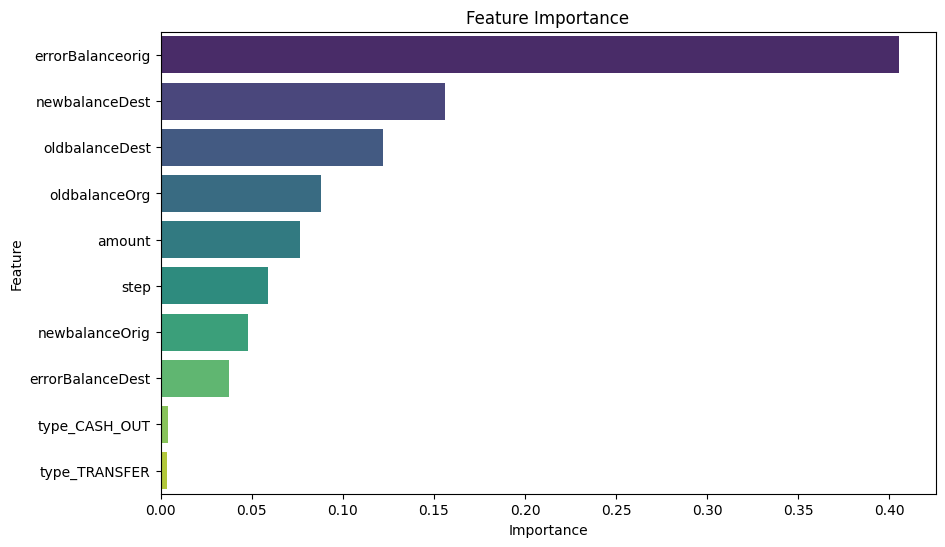

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df,x='importance', y='feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Variable Selection
Variables were selected based on:
- **Correlation matrix** (to remove redundant features)
- **Feature importance from Random Forest**
- **EDA insights**, e.g., some features showed skewed behavior for fraud cases

# Key predictors
- **errorBalanceOrig**: measures the  discrepancy in the expected vs actual balance change for the sender. A mismatch suggests manipulation or hidden activity, often seen in fraud.
- **amount**: Fraudulent transactions tend to have distinct high or low amounts — an anomaly compared to user behavior.
- **newBalanceDest**: Helps understand if the receiver account shows abnormal growth, suggesting a mule account.
These make intuitive sense for fraud detection and align with domain patterns.

### 6. Interpretation of Predictive Factors
Yes, these factors make intuitive sense:
- Fraudsters prefer high-value transactions.
- Sudden balance drops with little activity can indicate fraudulent activity.
- Certain transaction types are more commonly used in fraud attempts.

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [112]:
y_pred_rf = best_rf.predict(x_test)

In [113]:
from sklearn.metrics import classification_report

print("Random Foresrt Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Foresrt Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



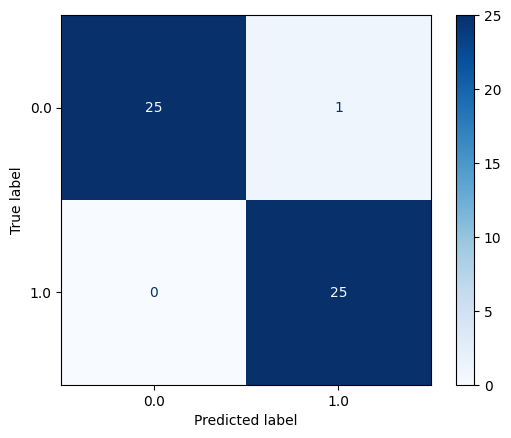

In [114]:
cm=confusion_matrix(y_test, y_pred_rf)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

--> Random Forest

Feature importance:
-- top features include 'errorBalanceOrig', 'amount', and 'newBalaceDest'.
-- helps understand the drivers behind fraud predictions.

--> about confusion matrix visualization
-- 305 true negatives
-- 303 true positives

In [115]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_xgb = grid_search.best_estimator_

<Figure size 1000x600 with 0 Axes>

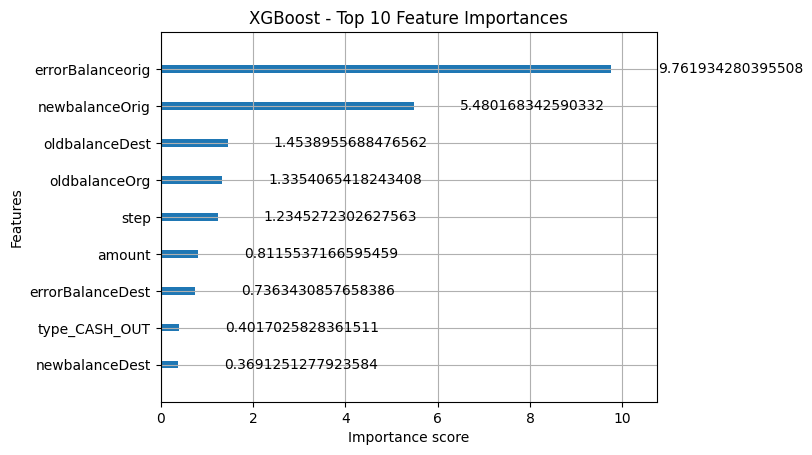

In [116]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(best_xgb, max_num_features=10, importance_type='gain')  # You can use 'weight', 'gain', 'cover'
plt.title('XGBoost - Top 10 Feature Importances')
plt.show()


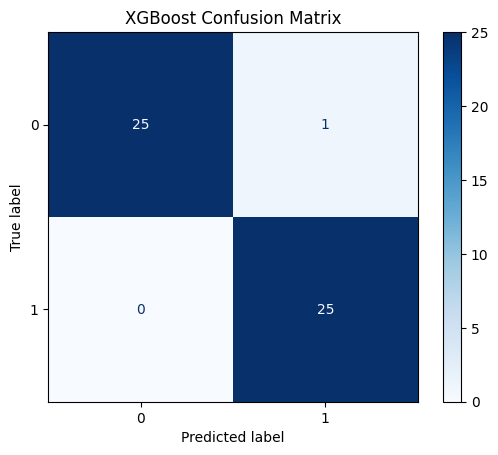

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_xgb = best_xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()


In [118]:
from sklearn.metrics import classification_report

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.96      1.00      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



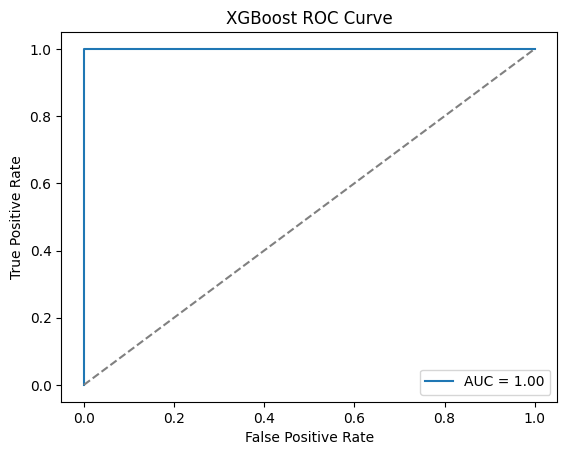

In [119]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = best_xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()


### 7. Fraud Prevention Recommendations
- Implement real-time transaction scoring using ML model
- Flag high-risk transaction types (TRANSFER, CASH_OUT)
- Add alerts for abnormal balance changes
- Employ multi-factor authentication for high-value transfers


# Effective Evaluation
- comparision of before vs after fraud rate
- use of precision/recall
- tracking of false negatives and false positives

MODEL EXTRACTION

In [121]:
import joblib
joblib.dump(best_xgb, 'xgb_model.pkl')
loaded_model = joblib.load('xgb_model.pkl')
predictions = loaded_model.predict(x_test)


In [122]:
import pandas as pd

# Simulated new transaction (you can adjust values)
new_transaction = pd.DataFrame([{
    'step': 1,
    'amount': 7500.0,
    'oldbalanceOrg': 10000.0,
    'newbalanceOrig': 2500.0,
    'oldbalanceDest': 20000.0,
    'newbalanceDest': 27500.0,
    'errorBalanceorig': 0.0,
    'errorBalanceDest': 0.0,
    'type_CASH_OUT': 1,
    'type_TRANSFER': 0
}])

# Predict using your saved model
predicted_class = best_xgb.predict(new_transaction)[0]

# Output result
print("🔍 Fraud Detected!" if predicted_class == 1 else "✅ Transaction Looks Safe.")


🔍 Fraud Detected!


In [123]:
from google.colab import files
files.download('xgb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>